# Problem Statement:


        To predict the Price of the Flights using ML Algorithms.
        
*Input Features:

Stops --> Indicates the number of stops between source and destination.

Duration --> TIme duration between source and  destination

Departure --> Flight Starting Point

Arrival --> Flight Destination Reach Point

DepartureTime --> Flight Starting Time

ArrivalTime --> Flight Destination Reach Time

*Output Target:

Price --> Price of the Flight Ticket.

In [1]:
#importing the required libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("flip_datas.xlsx")
df

,Price,Stops,Duration,Departure,Arrival,DepartureTime,ArrivalTime
0,7986,direct,2h 30m,BLR Bengaluru Intl,DEL Indira Gandhi Intl,13:20,15:50
1,7205,direct,2h 35m,BLR Bengaluru Intl,DEL Indira Gandhi Intl,10:25,13:00
2,7238,direct,2h 35m,BLR Bengaluru Intl,DEL Indira Gandhi Intl,17:45,20:20
3,7343,direct,2h 35m,BLR Bengaluru Intl,DEL Indira Gandhi Intl,21:10,23:45
4,3500,direct,2h 40m,BLR Bengaluru Intl,DEL Indira Gandhi Intl,00:10,02:50
...,...,...,...,...,...,...,...
2171,939788,2 stops,31h 20m,GVA Geneve-Cointrin,DEL Indira Gandhi Intl,08:15,20:05
2172,940775,2 stops,32h 25m,GVA Geneve-Cointrin,DEL Indira Gandhi Intl,07:10,20:05
2173,943223,2 stops,32h 45m,GVA Geneve-Cointrin,DEL Indira Gandhi Intl,08:15,21:30
2174,1041857,1 stop,30h 00m,LHR Heathrow,DEL Indira Gandhi Intl,10:00,21:30


In [4]:
# Summary of each column and its datatype,

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Price          2176 non-null   int64 
 1   Stops          2176 non-null   object
 2   Duration       2176 non-null   object
 3   Departure      2176 non-null   object
 4   Arrival        2176 non-null   object
 5   DepartureTime  2176 non-null   object
 6   ArrivalTime    2176 non-null   object
dtypes: int64(1), object(6)
memory usage: 119.1+ KB


In [5]:
# Checking if any null values in a dataset,

df.isnull().sum()

Price            0
Stops            0
Duration         0
Departure        0
Arrival          0
DepartureTime    0
ArrivalTime      0
dtype: int64

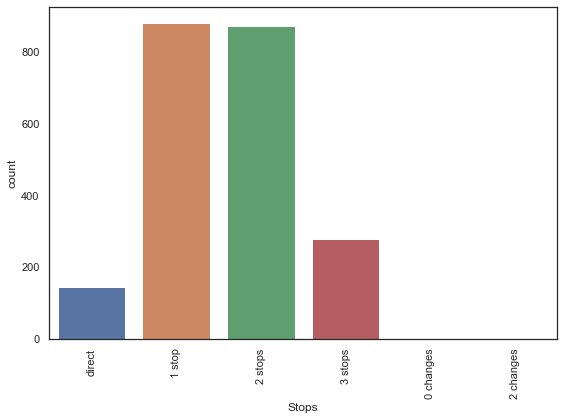

In [8]:
sns.set_theme(style = 'white')
plt.figure(figsize = (8,6))
sns.countplot(x = df['Stops'])
plt.xticks(rotation = 90)
plt.tight_layout()

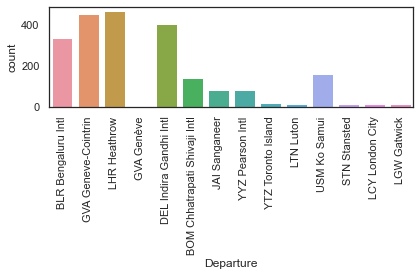

In [10]:
sns.countplot(x = df['Departure'])
plt.xticks(rotation = 90)
plt.tight_layout()

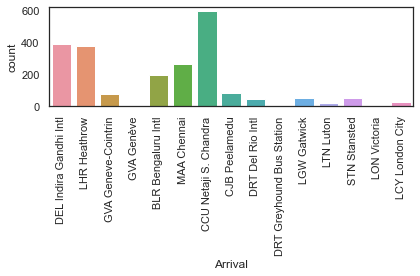

In [11]:
sns.countplot(x = df['Arrival'])
plt.xticks(rotation = 90)
plt.tight_layout()

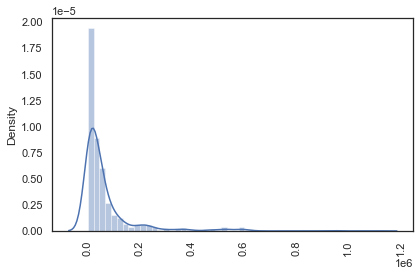

In [12]:
sns.distplot(x = df['Price'])
plt.xticks(rotation = 90)
plt.tight_layout()

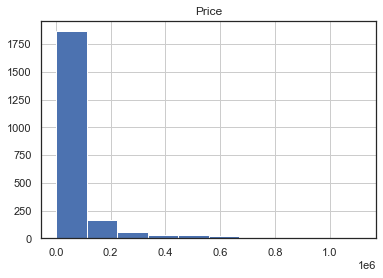

In [14]:
df.hist()
plt.show()

In [16]:
df['Stops'].value_counts()

1 stop       882
2 stops      871
3 stops      278
direct       143
2 changes      1
0 changes      1
Name: Stops, dtype: int64

In [17]:
df['Departure'].value_counts()

LHR Heathrow                    463
GVA Geneve-Cointrin             451
DEL Indira Gandhi Intl          401
BLR Bengaluru Intl              335
USM Ko Samui                    159
BOM Chhatrapati Shivaji Intl    141
YYZ Pearson Intl                 82
JAI Sanganeer                    81
YTZ Toronto Island               19
LCY London City                  12
STN Stansted                     11
LGW Gatwick                      10
LTN Luton                        10
GVA Genève                        1
Name: Departure, dtype: int64

In [18]:
df['Arrival'].value_counts()

CCU Netaji S. Chandra        593
DEL Indira Gandhi Intl       389
LHR Heathrow                 379
MAA Chennai                  261
BLR Bengaluru Intl           197
CJB Peelamedu                 84
GVA Geneve-Cointrin           78
LGW Gatwick                   50
STN Stansted                  48
DRT Del Rio Intl              46
LCY London City               28
LTN Luton                     20
DRT Greyhound Bus Station      1
LON Victoria                   1
GVA Genève                     1
Name: Arrival, dtype: int64

In [19]:
# Splitting hour and minutes as separate columns and dropping the actual column,

df['dep_hr'] = pd.DatetimeIndex(df['DepartureTime']).hour
df['dep_min'] = pd.DatetimeIndex(df['DepartureTime']).minute
df['arr_hr'] = pd.DatetimeIndex(df['ArrivalTime']).hour
df['arr_min'] = pd.DatetimeIndex(df['ArrivalTime']).minute

df = df.drop(columns = ['DepartureTime','ArrivalTime'], axis = 1)

In [20]:
# splitting duration column which has string and integer,

df['Duration'] = df['Duration'].str.split(' ')
df['dur_hr'] = df['Duration'].str[0]
df['dur_hr'] = df['dur_hr'].str.split('h')
df['dur_hr'] = df['dur_hr'].str[0]

df['dur_min'] = df['Duration'].str[1]
df['dur_min'] = df['dur_min'].str.split('m')
df['dur_min'] = df['dur_min'].str[0]


# changing datatype into Int for duration hour and min column,

df['dur_hr'] = df['dur_hr'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

# dropping duration columns,

df = df.drop(columns = ['Duration'], axis = 1)
df.head()


,Price,Stops,Departure,Arrival,dep_hr,dep_min,arr_hr,arr_min,dur_hr,dur_min
0,7986,direct,BLR Bengaluru Intl,DEL Indira Gandhi Intl,13,20,15,50,2,30
1,7205,direct,BLR Bengaluru Intl,DEL Indira Gandhi Intl,10,25,13,0,2,35
2,7238,direct,BLR Bengaluru Intl,DEL Indira Gandhi Intl,17,45,20,20,2,35
3,7343,direct,BLR Bengaluru Intl,DEL Indira Gandhi Intl,21,10,23,45,2,35
4,3500,direct,BLR Bengaluru Intl,DEL Indira Gandhi Intl,0,10,2,50,2,40


In [21]:
le = LabelEncoder()
col = ['Stops','Departure','Arrival']
for i in col:
    df[col] = df[col].apply(le.fit_transform)
    
df

,Price,Stops,Departure,Arrival,dep_hr,dep_min,arr_hr,arr_min,dur_hr,dur_min
0,7986,5,0,3,13,20,15,50,2,30
1,7205,5,0,3,10,25,13,0,2,35
2,7238,5,0,3,17,45,20,20,2,35
3,7343,5,0,3,21,10,23,45,2,35
4,3500,5,0,3,0,10,2,50,2,40
...,...,...,...,...,...,...,...,...,...,...
2171,939788,3,3,3,8,15,20,5,31,20
2172,940775,3,3,3,7,10,20,5,32,25
2173,943223,3,3,3,8,15,21,30,32,45
2174,1041857,1,8,3,10,0,21,30,30,0


In [22]:
df.info()  ## checking the datatypes and null values after pre-processing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      2176 non-null   int64
 1   Stops      2176 non-null   int64
 2   Departure  2176 non-null   int64
 3   Arrival    2176 non-null   int64
 4   dep_hr     2176 non-null   int64
 5   dep_min    2176 non-null   int64
 6   arr_hr     2176 non-null   int64
 7   arr_min    2176 non-null   int64
 8   dur_hr     2176 non-null   int32
 9   dur_min    2176 non-null   int32
dtypes: int32(2), int64(8)
memory usage: 153.1 KB


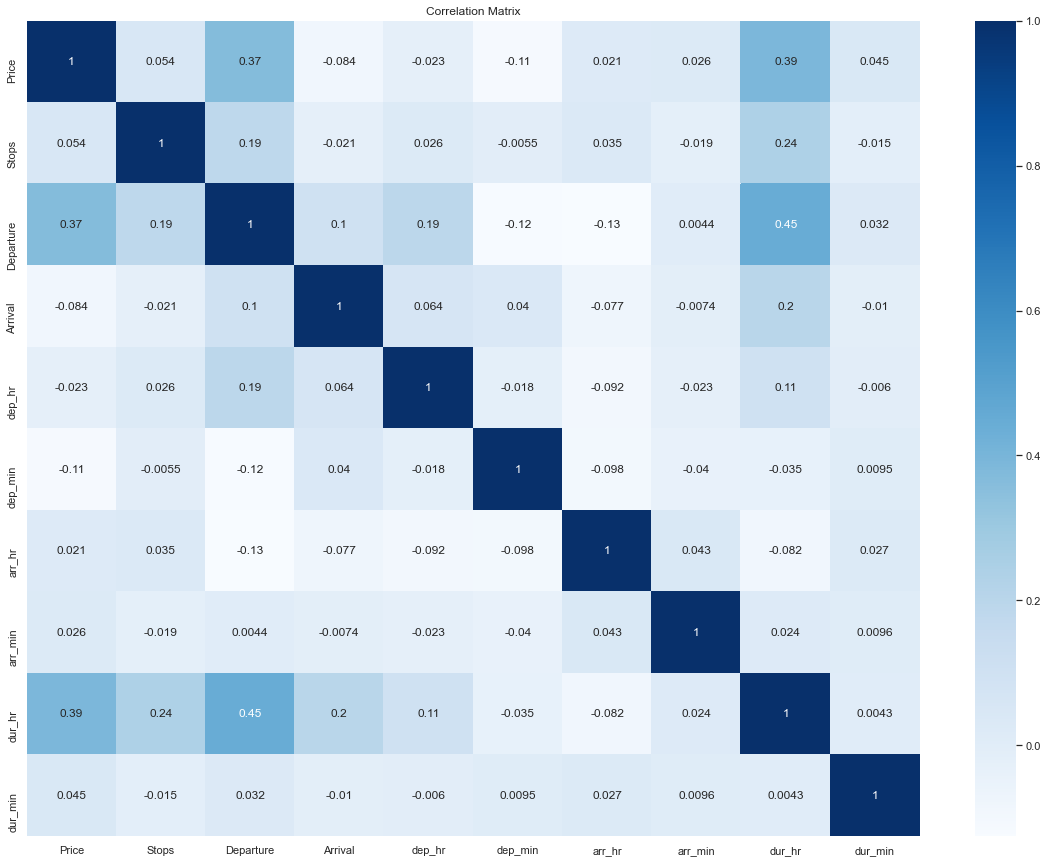

In [28]:
# correlation matrix,

data = df.corr()
plt.figure(figsize= (20,15))
sns.heatmap(data, cmap = 'Blues',annot = True)
plt.title("Correlation Matrix")
plt.show()

In [29]:
df = df.sample(frac = 1) #shuffling the data

In [30]:
# SPlitting X and Y

x = df.drop(columns = ['Price'])
y = df['Price']

In [31]:
# Train test split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 666)

r2_Score 0.7426387654742299
CV Score 0.7175034569752188
MSE 1953745269.956113
RMSE 44201.190820566284
Train Score 0.959456711082639
Test Score 0.7426387654742299


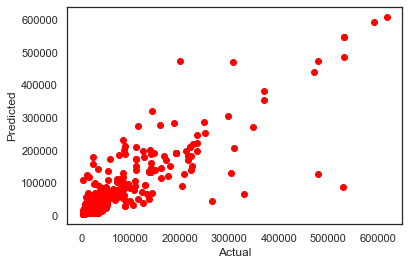

In [43]:
# Random Forest regressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

scr_rf = cross_val_score(rf,x,y,cv = 5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_rf.mean())
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Train Score", rf.score(x_train,y_train))
print("Test Score", rf.score(x_test,y_test))

plt.scatter(y_test,y_pred, color = 'red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

r2_Score 0.6798001257513735
CV Score 0.6457350181421522
MSE 2430781741.1062145
RMSE 49302.958745963864
Train Score 0.7772560170813632
Test Score 0.6798001257513735


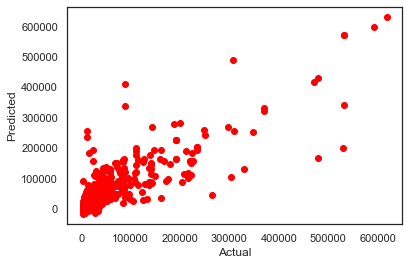

In [42]:
# Gradient Boost Regression

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

scr_gb = cross_val_score(gb,x,y,cv = 5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_gb.mean())
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Train Score", gb.score(x_train,y_train))
print("Test Score", gb.score(x_test,y_test))

plt.scatter(y_test,y_pred, color = 'red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

r2_Score 0.38346564668462435
CV Score 0.44801422132787455
MSE 4680390497.717916
RMSE 68413.37952270677
Train Score 0.617782802600386
Test Score 0.38346564668462435


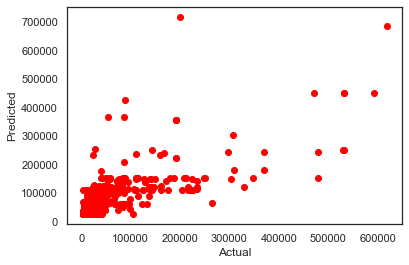

In [41]:
# Ada Boost Regression

from sklearn.ensemble import AdaBoostRegressor

ab = AdaBoostRegressor()
ab.fit(x_train,y_train)
y_pred = ab.predict(x_test)

scr_ab = cross_val_score(ab,x,y,cv = 5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_ab.mean())
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Train Score", ab.score(x_train,y_train))
print("Test Score", ab.score(x_test,y_test))

plt.scatter(y_test,y_pred, color = 'red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

r2_Score 0.5750020489302832
CV Score 0.4939544577197562
MSE 3226351234.184633
RMSE 56800.979165720666
Train Score 0.6526400336412728
Test Score 0.5750020489302832


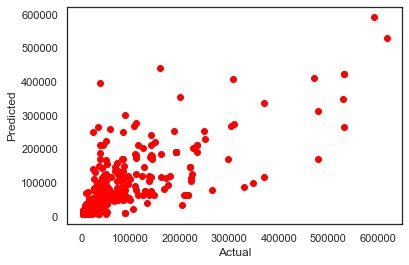

In [40]:
# K Neighbors regression

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 5)
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)

scr_knr = cross_val_score(knr,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_knr.mean())
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Train Score", knr.score(x_train,y_train))
print("Test Score", knr.score(x_test,y_test))

plt.scatter(y_test,y_pred, color = 'red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Based on Cv Score, Random Forest is the best model woth accuracy of 72%.

Lets apply hyper parameter tuning to the model and try to increase the model accuracy score.

In [46]:
# Hyper parameter tuning by randomized Search CV 

param = {'n_estimators': [100], 'criterion':['mse'], 'max_depth':[2,4,6,8,10,12], 'min_samples_split':[2],
         'min_samples_leaf':[1],
      'max_leaf_nodes':[3,6,9,12,15],'random_state':[None],
          'max_samples':[2,4,6,8,10,12,]
        }

gs = RandomizedSearchCV(rf,param_distributions = param, cv=5)
gs.fit(x_train,y_train)
gs.best_params_

{'random_state': None,
 'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 12,
 'max_leaf_nodes': 15,
 'max_depth': 10,
 'criterion': 'mse'}

In [67]:
# Training the model which is best based on different parameters

final = RandomForestRegressor(n_estimators = 100, max_depth=20 , criterion = 'mse', 
                              min_samples_split = 20, max_leaf_nodes=66, max_samples= 1500,random_state=None )
final.fit(x_train,y_train)
y_pred = final.predict(x_test)

print("r2_Score", r2_score(y_test,y_pred))
print("Train Score", final.score(x_train,y_train))
print("Test Score", final.score(x_test,y_test))

r2_Score 0.7262723653712845
Train Score 0.7698315485113302
Test Score 0.7262723653712845


Text(0, 0.5, 'Predicted')

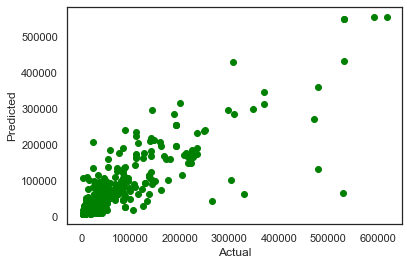

In [68]:
plt.scatter(y_test,y_pred, color = 'green')
plt.xlabel("Actual")
plt.ylabel("Predicted")

We can see that our model score increased to 73%.

In [70]:
# Saving the model

import joblib
joblib.dump(final,"Flipflight_price.pkl")

['Flipflight_price.pkl']